In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="ticks", palette="pastel")

PATH = 'C:/Users/user/Desktop/AI & ML/Project/Wafer/'

In [2]:
#read training file, in future this will be called as function
#df_read = pd.read_csv(PATH+"FordB_Train_TAO.csv",names=["file_name","label"],header=None)

df_read = pd.read_csv(PATH+"TA_Wafer_TEST.csv",names=["file_name","label"],header=None)

In [3]:
#A feature Dataframe, feature columns will be added later
df_feature = df_read.set_index("file_name")
df_feature.shape

(6164, 1)

In [4]:
#create a df with details of all csv in training file
df_result = pd.DataFrame(index=range(0,152))

for eachfile in df_read["file_name"].tolist():
    df_test = pd.read_csv(PATH+eachfile+".csv",names=[eachfile],header=None)
    df_result[eachfile] = df_test


In [5]:
#transpose of resut DF
result = df_result.T
#print result DF
result.head()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
Wafer_TEST_0,-1.079707,-1.083256,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,...,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707
Wafer_TEST_1,-1.080197,-1.078021,-1.078021,-1.078021,-1.078021,-1.078021,-1.080197,-1.078021,-1.078021,-1.080197,...,-1.110670,-1.112846,-1.115023,-1.117199,-1.119376,-1.121553,-1.123729,-1.125906,-1.128082,-1.130259
Wafer_TEST_2,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,...,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060
Wafer_TEST_3,-1.658965,-1.696605,-1.705291,-1.711082,-1.711082,-1.715425,-1.715425,-1.715425,-1.715425,-1.715425,...,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382
Wafer_TEST_4,-1.201221,-1.199042,-1.199042,-1.201221,-1.199042,-1.199042,-1.199042,-1.199042,-1.199042,-1.199042,...,-1.185968,-1.183789,-1.181610,-1.179431,-1.177251,-1.175072,-1.172893,-1.170714,-1.168535,-1.166356


In [6]:
#adding columns in feature df, each column represent a feature
df_feature["mean"] = result.mean(axis=1)
df_feature["var"] = result.var(axis=1)
df_feature["std"] = result.std(axis=1)
df_feature["skew"] = result.skew(axis=1)
df_feature["kurt"] = result.kurt(axis=1)
df_feature["mode"] = result.max(axis=1) - result.min(axis=1)
df_feature["kurtosis"] = result.kurtosis(axis=1)

# Feature selection in Time Domain

Below cells are to visualise different feature in Time domain.


# Comparison of Mean's for Good vs Bad engine

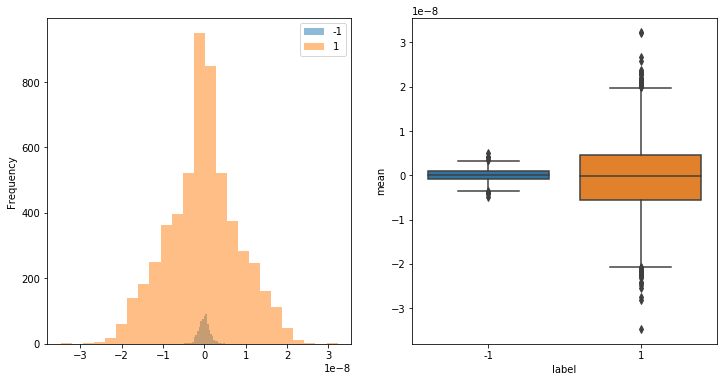

In [7]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean', data = df_feature,ax=ax[1])
#sns.scatterplot(x = 'mean',y = 'mean', data = df_feature,ax=ax[2])

# Comparison of Variance's for Good vs Bad engine

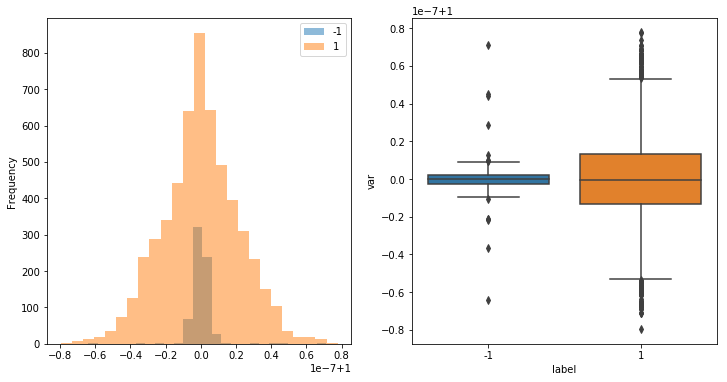

In [8]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var', data = df_feature,ax=ax[1])

# Comparison of Mean's for Good vs Bad engine

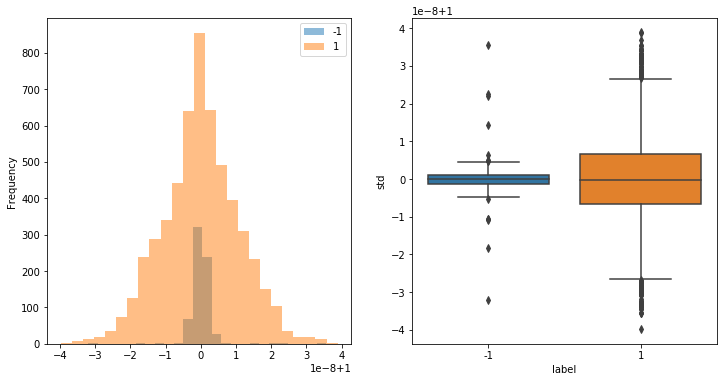

In [9]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std', data = df_feature,ax=ax[1])

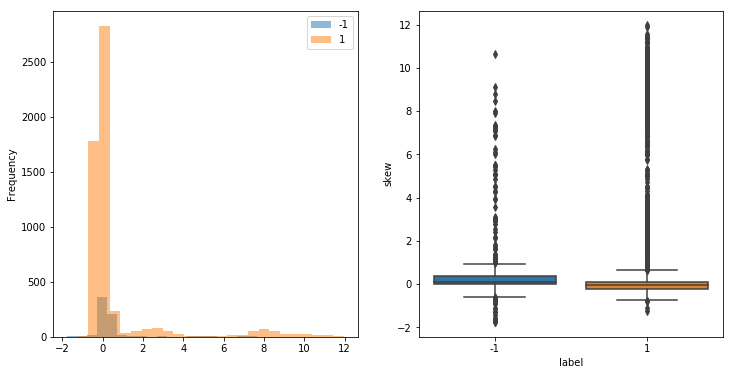

In [10]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew', data = df_feature,ax=ax[1])

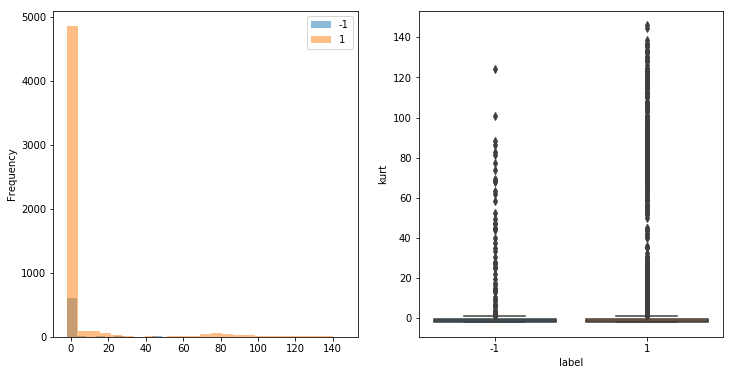

In [11]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt', data = df_feature,ax=ax[1])

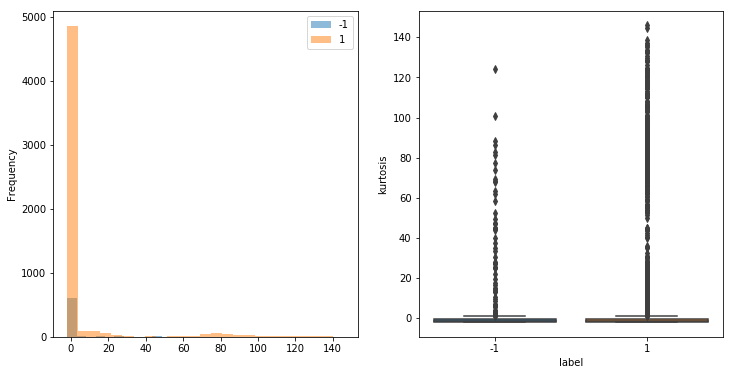

In [12]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurtosis"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurtosis', data = df_feature,ax=ax[1])

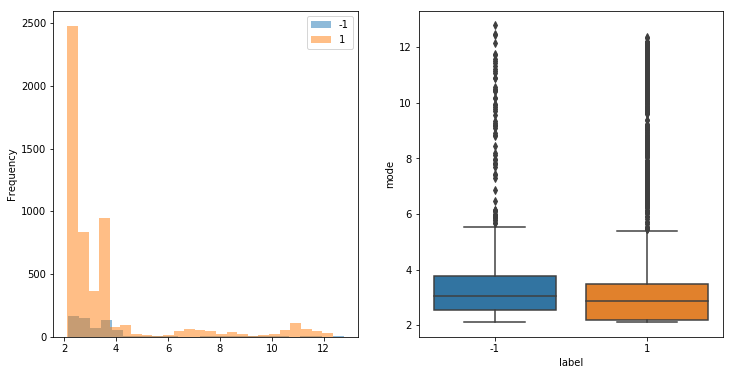

In [13]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode', data = df_feature,ax=ax[1])

# ZCR plot

In [14]:
def zero_crossing_rate_BruteForce(enginedata):
    
    zero_crossings = 0
    
    for i in range(1, len(enginedata)):
        
        if ( enginedata[i - 1] <  0 and enginedata[i] >  0 ) or \
           ( enginedata[i - 1] >  0 and enginedata[i] <  0 ) or \
           ( enginedata[i - 1] != 0 and enginedata[i] == 0):
                
                zero_crossings += 1
                
    zero_crossing_rate = zero_crossings / float(len(enginedata) - 1)

    return zero_crossing_rate

In [15]:
zcr = []
for j in range(0,result.shape[0]):
    zcr.append(zero_crossing_rate_BruteForce(result.iloc[j]))

In [16]:
df_feature["zcr"] = zcr

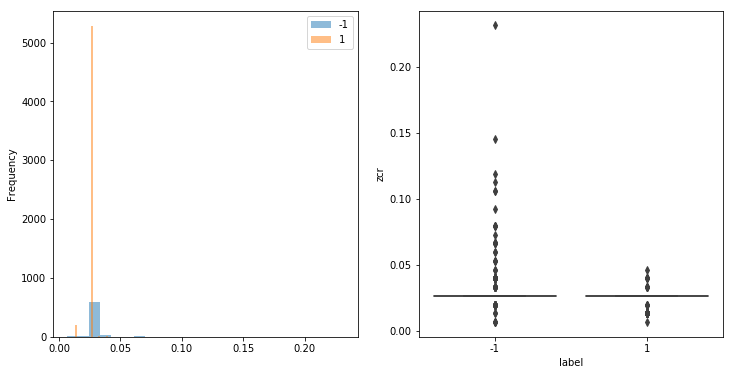

In [17]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["zcr"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'zcr', data = df_feature,ax=ax[1])

# RMS plot

In [18]:
df_feature["rms"] = result.pow(2).sum(axis=1) / 152
df_feature["rms"] = df_feature["rms"].pow(1/2)

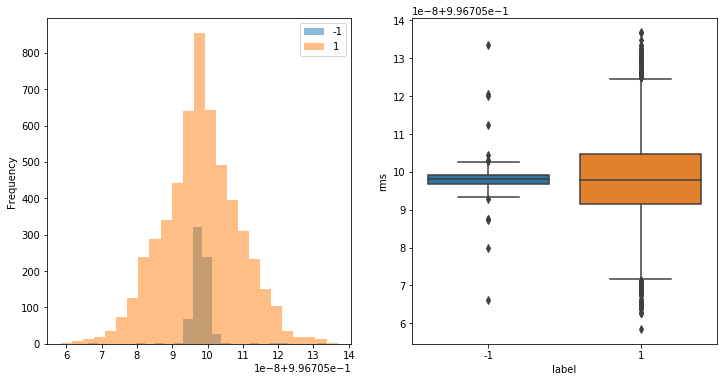

In [19]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["rms"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'rms', data = df_feature,ax=ax[1])

# Energy Data plot

In [20]:
df_feature['energy'] = result.pow(2).sum(axis=1)

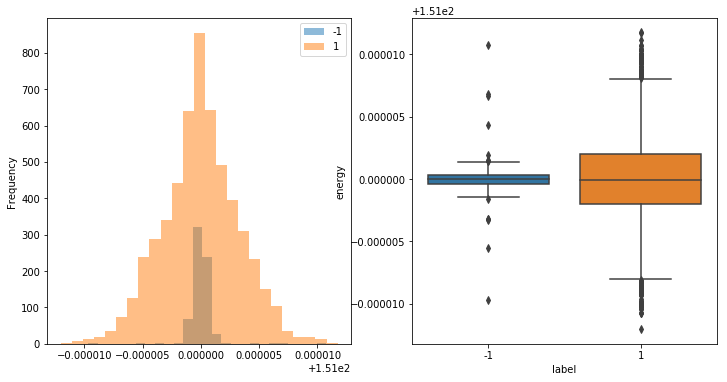

In [21]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["energy"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'energy', data = df_feature,ax=ax[1])

# Crest Factor

In [22]:
df_feature['CF'] = result.abs().max(axis=1)/result.pow(2).mean(axis=1).pow(1/2)

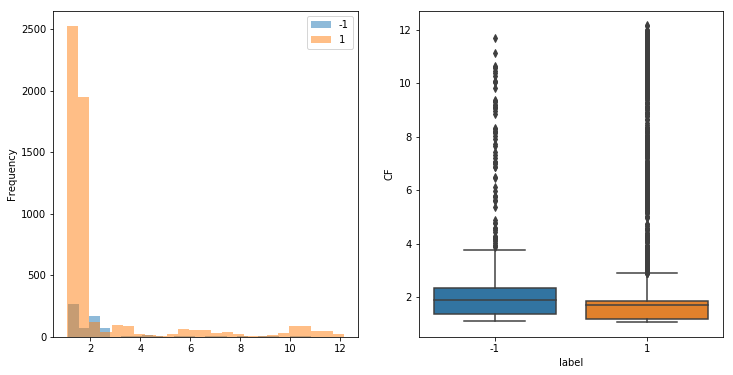

In [23]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["CF"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'CF', data = df_feature,ax=ax[1])

# Visualising Sensor Data

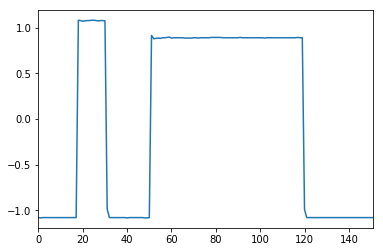

In [24]:
#sample plot of good engine data
result.iloc[0].plot()

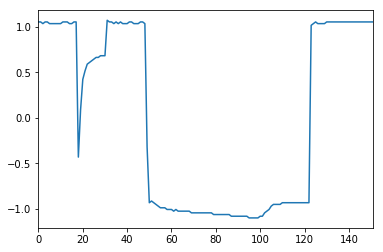

In [25]:
# plot of a bad engine data in time domain
result.iloc[12].plot()

# Feature analysis in Frequency Domain

# Mean plot in FFT

In [26]:
from scipy.fftpack import fft,fftfreq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



# Adding fft features

In [27]:
result_fft = pd.DataFrame([(2/152 * np.abs(fft(result.iloc[x])[0:np.int(152/2)])) for x in range(0,result.shape[0])],index=df_feature.index)

df_feature['mean_fft'] = result_fft.mean(axis=1)
df_feature['std_fft'] = result_fft.std(axis=1)
df_feature['var_fft'] = result_fft.var(axis=1)
df_feature['skew_fft'] = result_fft.skew(axis=1)
df_feature['kurt_fft'] = result_fft.kurt(axis=1)
df_feature['kurtosis_fft'] = result_fft.kurtosis(axis=1)
df_feature['energy_fft'] = result_fft.pow(2).sum(axis=1)
df_feature["rms_fft"] = result_fft.pow(2).sum(axis=1) / 76
df_feature["rms_fft"] = df_feature["rms_fft"].pow(1/2)
df_feature.head()

,label,mean,var,std,skew,kurt,mode,kurtosis,zcr,rms,energy,CF,mean_fft,std_fft,var_fft,skew_fft,kurt_fft,kurtosis_fft,energy_fft,rms_fft
file_name,,,,,,,,,,,,,,,,,,,,
Wafer_TEST_0,1,8.552629e-10,1.0,1.0,-0.152205,-1.991028,2.164737,-1.991028,0.02649,0.996705,151.000000,1.086837,0.078586,0.142243,0.020233,4.246236,21.430747,21.430747,1.986840,0.161687
Wafer_TEST_1,1,-1.519737e-08,1.0,1.0,-0.123626,-1.940561,2.278905,-1.940561,0.02649,0.996705,151.000004,1.152443,0.070658,0.146368,0.021424,5.361911,34.647985,34.647985,1.986201,0.161661
Wafer_TEST_2,1,-1.174342e-08,1.0,1.0,-0.230030,-1.896591,2.170428,-1.896591,0.02649,0.996705,151.000005,1.160059,0.068462,0.147450,0.021741,5.616348,36.694955,36.694955,1.986816,0.161686
Wafer_TEST_3,1,1.842106e-10,1.0,1.0,-0.117342,-0.529291,3.543921,-0.529291,0.02649,0.996705,151.000000,1.834541,0.080040,0.141414,0.019998,3.078722,9.274652,9.274652,1.986723,0.161682
Wafer_TEST_4,1,4.513158e-09,1.0,1.0,-0.294882,-1.852437,2.196519,-1.852437,0.02649,0.996705,150.999999,1.205192,0.068376,0.147491,0.021754,5.585744,36.206511,36.206511,1.986838,0.161687


# Plots in Frequency domain

Mean Plot

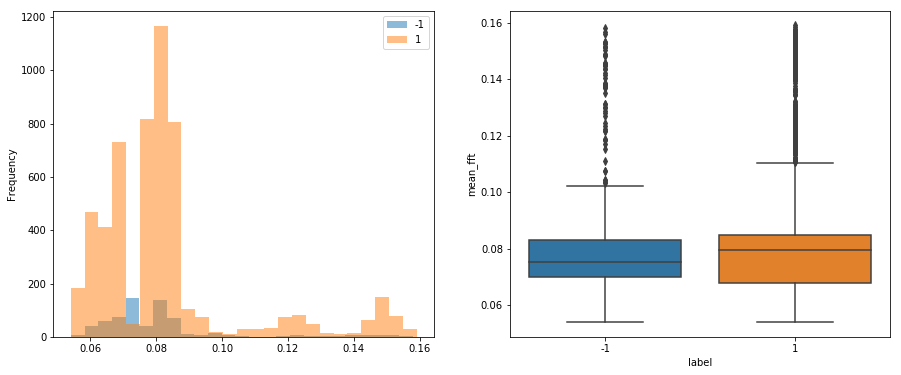

In [28]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
df_feature.groupby("label")["mean_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_fft', data = df_feature,ax=ax[1])

STD Plot

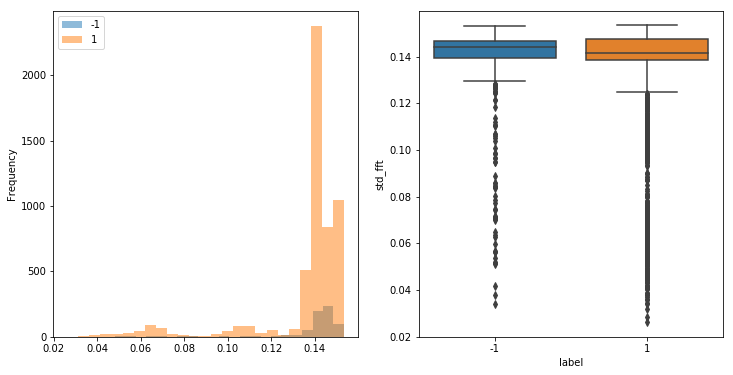

In [29]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_fft', data = df_feature,ax=ax[1])

Var Plot

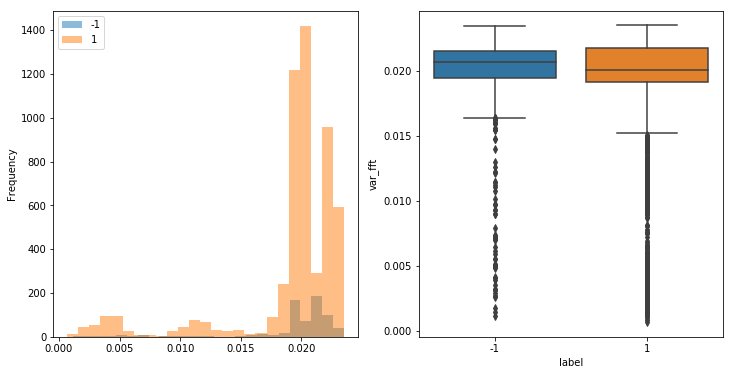

In [30]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_fft', data = df_feature,ax=ax[1])

Skew Plot

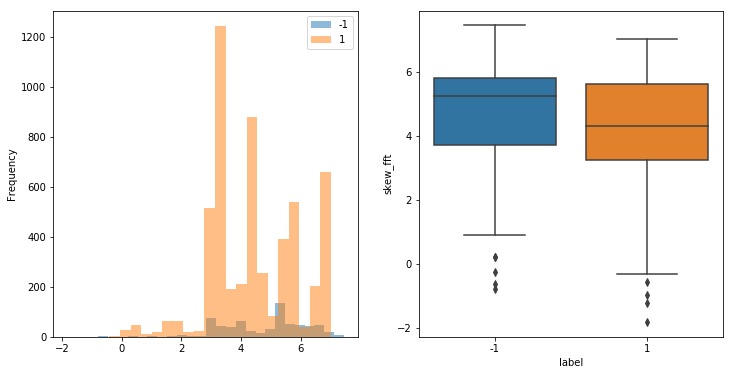

In [31]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_fft', data = df_feature,ax=ax[1])

Kurt Plot

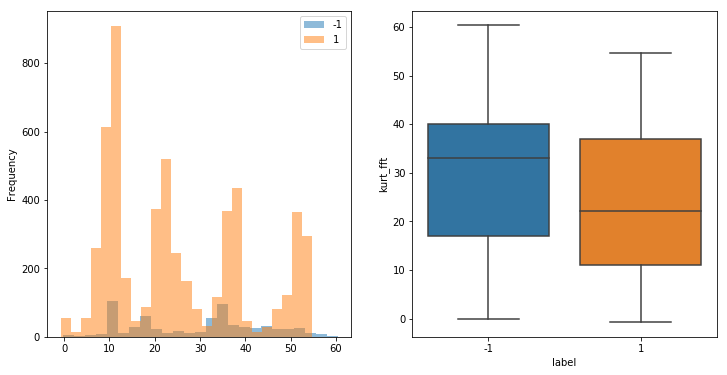

In [32]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_fft', data = df_feature,ax=ax[1])

Kurtosis Plot

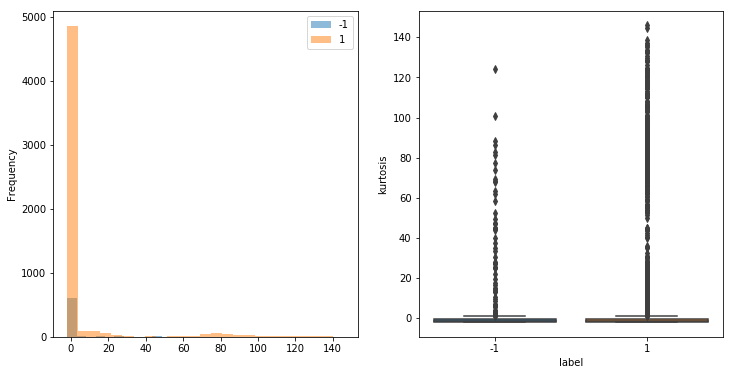

In [33]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurtosis"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurtosis', data = df_feature,ax=ax[1])

Energy Plot

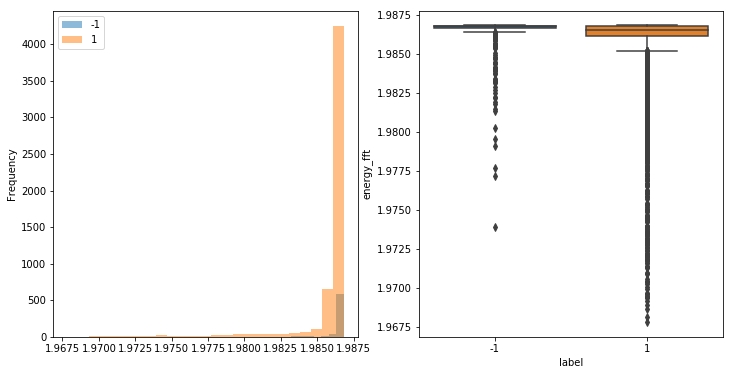

In [34]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["energy_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'energy_fft', data = df_feature,ax=ax[1])

RMS Plot

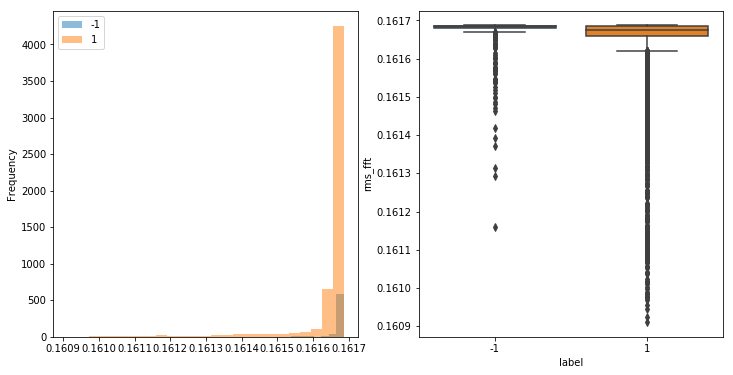

In [35]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["rms_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'rms_fft', data = df_feature,ax=ax[1])

In [36]:
result_fft['label'] = df_feature['label']

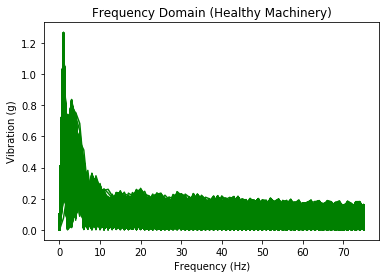

In [37]:
# FFT superimpose Good engine
result_fft_good = result_fft[result_fft['label'] == 1]
result_fft_good = result_fft_good.drop(['label'],axis=1)
for ix in range(0,result_fft_good.shape[0]):
    plt.plot([i for i in range(0,76)], result_fft_good.iloc[ix], linestyle='-', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Healthy Machinery)');

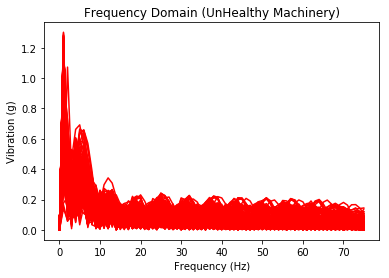

In [38]:
# FFT superimpose Bad engine
result_fft_bad = result_fft[result_fft['label'] == -1]
result_fft_bad = result_fft_bad.drop(['label'],axis=1)
for ix in range(0,result_fft_bad.shape[0]):
    plt.plot([i for i in range(0,76)], result_fft_bad.iloc[ix], linestyle='-', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (UnHealthy Machinery)');

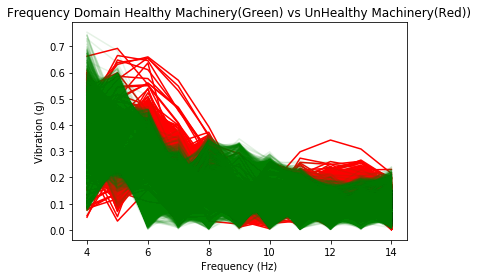

In [39]:
# FFT superimpose Good engine vs Bad engine
result_fft_good = result_fft[result_fft['label'] == 1]
result_fft_good = result_fft_good.drop(['label'],axis=1)
result_fft_bad = result_fft[result_fft['label'] == -1]
result_fft_bad = result_fft_bad.drop(['label'],axis=1)
for ix in range(0,result_fft_bad.shape[0]):
    plt.plot([i for i in range(4,15)], result_fft_bad.iloc[ix][4:15], linestyle='-', color='red')
for ix in range(0,result_fft_good.shape[0]):
    plt.plot([i for i in range(4,15)], result_fft_good.iloc[ix][4:15], linestyle='-', color='green',alpha = 0.1)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain Healthy Machinery(Green) vs UnHealthy Machinery(Red))');

# FFT -WINDOWED

In [40]:
result_fft_windowed = result_fft.drop([i for i in range(0,4)],axis=1)
result_fft_windowed = result_fft_windowed.drop([i for i in range(15,76)],axis=1)
result_fft_windowed = result_fft_windowed.drop(['label'],axis=1)
result_fft_windowed.head()

,4,5,6,7,8,9,10,11,12,13,14
file_name,,,,,,,,,,,
Wafer_TEST_0,0.449459,0.457524,0.129667,0.175986,0.176727,0.075670,0.184027,0.021376,0.108431,0.051764,0.130891
Wafer_TEST_1,0.350623,0.397300,0.113967,0.165221,0.134224,0.048731,0.170601,0.081074,0.065254,0.041644,0.133134
Wafer_TEST_2,0.197184,0.397571,0.130242,0.064712,0.102428,0.204910,0.036976,0.101193,0.051517,0.127071,0.051145
Wafer_TEST_3,0.521488,0.471316,0.323567,0.030976,0.241946,0.209478,0.217305,0.189453,0.056238,0.053025,0.031936
Wafer_TEST_4,0.190931,0.387901,0.175964,0.076516,0.041573,0.199436,0.083084,0.071545,0.021651,0.140931,0.099328


In [41]:
#adding columns in feature df, each column represent a feature
df_feature["mean_fftw"] = result_fft_windowed.mean(axis=1)
df_feature["var_fftw"] = result_fft_windowed.var(axis=1)
df_feature["std_fftw"] = result_fft_windowed.std(axis=1)
df_feature["skew_fftw"] = result_fft_windowed.skew(axis=1)
df_feature["kurt_fftw"] = result_fft_windowed.kurt(axis=1)
df_feature["mode_fftw"] = result_fft_windowed.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_fftw"] = result_fft_windowed.kurtosis(axis=1)

Mean Plot

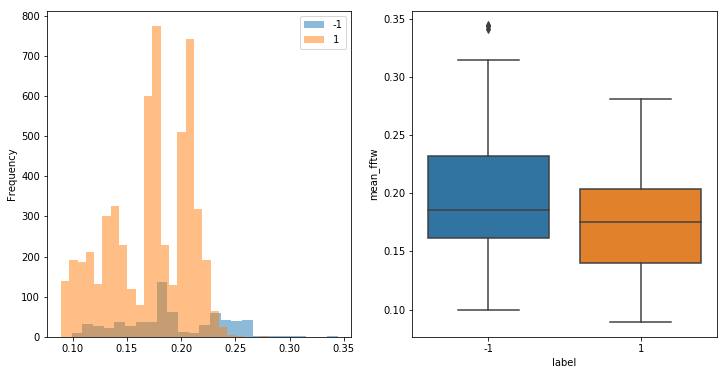

In [42]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_fftw', data = df_feature,ax=ax[1])

Var PLot

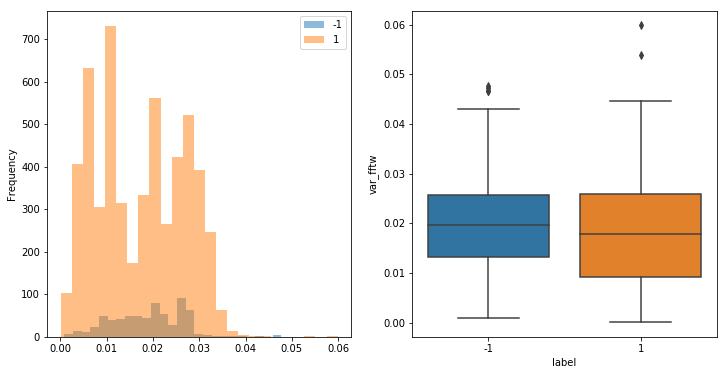

In [43]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_fftw', data = df_feature,ax=ax[1])

std plot

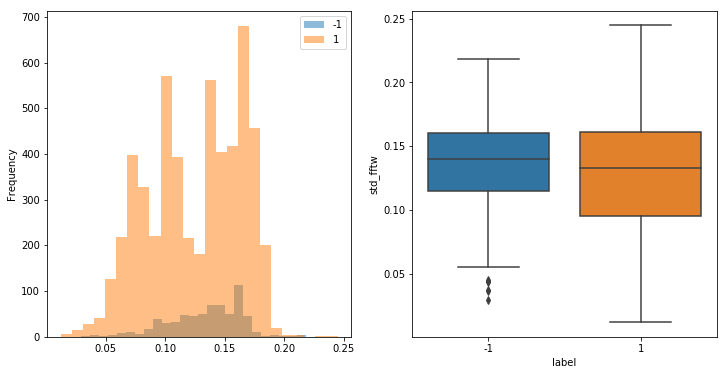

In [44]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_fftw', data = df_feature,ax=ax[1])

skew plot

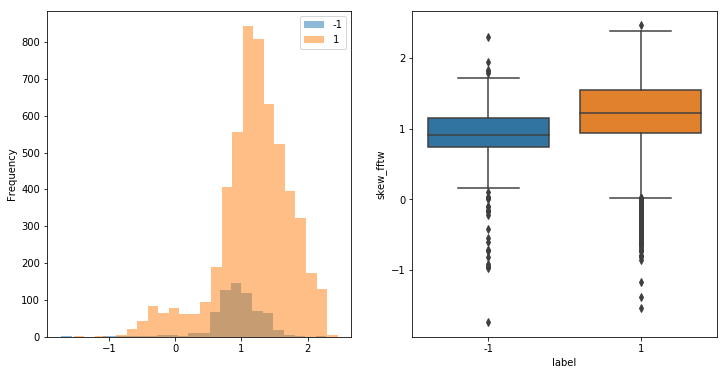

In [45]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_fftw', data = df_feature,ax=ax[1])

kurt plot

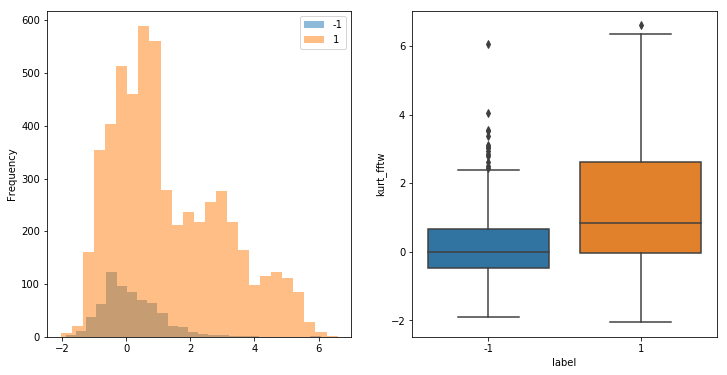

In [46]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_fftw', data = df_feature,ax=ax[1])

Mode plot

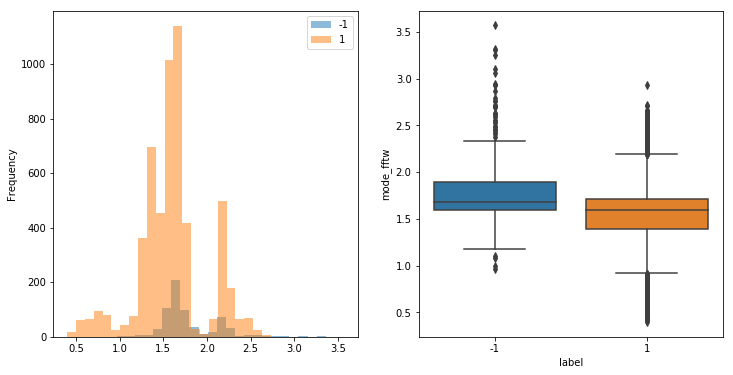

In [47]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_fftw', data = df_feature,ax=ax[1])

# Power Spectral Density

In [48]:
from scipy.signal import welch


In [49]:
freq_value, _w =welch(result.iloc[0])

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))


In [50]:
result_psd = pd.DataFrame([ welch(result.iloc[x])[1] for x in range(0,result.shape[0])],index=df_feature.index)

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
C:\Users\user\Anaconda3\lib\site-packages\sci

In [51]:
result_psd['label'] = df_feature['label']

Text(0, 0.5, 'PSD [V**2 / Hz]')

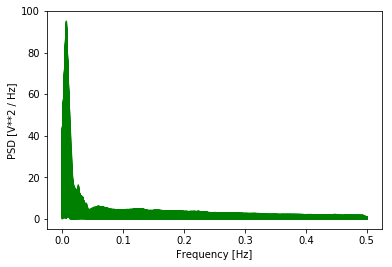

In [52]:
#Good Engine plot
result_psd_good = result_psd[result_psd['label'] == 1]
result_psd_good = result_psd_good.drop(['label'],axis=1)
for ix in range(0,result_psd_good.shape[0]):
    plt.plot(freq_value, result_psd_good.iloc[ix], linestyle='-', color='green')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')

Text(0, 0.5, 'PSD [V**2 / Hz]')

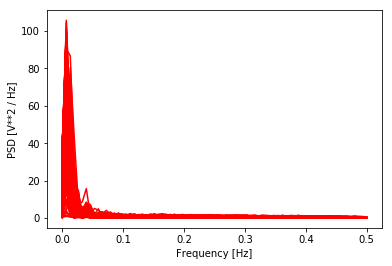

In [53]:
#Bad Engine plot
result_psd_bad = result_psd[result_psd['label'] == -1]
result_psd_bad = result_psd_bad.drop(['label'],axis=1)
for ix in range(0,result_psd_bad.shape[0]):
    plt.plot(freq_value, result_psd_bad.iloc[ix], linestyle='-', color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')

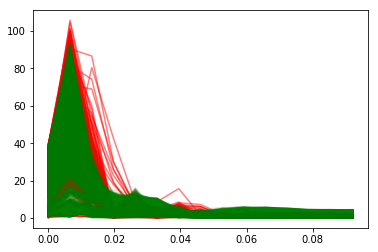

In [54]:
result_psd_good = result_psd[result_psd['label'] == 1]
result_psd_good = result_psd_good.drop(['label'],axis=1)
result_psd_bad = result_psd[result_psd['label'] == -1]
result_psd_bad = result_psd_bad.drop(['label'],axis=1)
for ix in range(0,result_psd_bad.shape[0]):
    plt.plot(freq_value[0:15], result_psd_bad.iloc[ix][0:15], linestyle='-', color='red',alpha=0.5)
for ix in range(0,result_psd_good.shape[0]):
    plt.plot(freq_value[0:15], result_psd_good.iloc[ix][0:15], linestyle='-', color='green',alpha=0.1)


In [55]:
result_psd_windowed = result_psd.drop([i for i in range(15,77)],axis=1)
#result_psd_windowed = result_psd_windowed.drop([i for i in range(0,10)],axis=1)
result_psd_windowed = result_psd_windowed.drop(['label'],axis=1)
result_psd_windowed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
file_name,,,,,,,,,,,,,,,
Wafer_TEST_0,23.150912,52.598010,20.319501,7.045171,8.931115,5.190899,1.873345,0.489103,0.773824,0.171221,1.514707,0.273890,1.023915,0.186947,0.530857
Wafer_TEST_1,29.287117,65.754615,16.936323,8.601084,7.532750,4.590163,1.899724,0.835108,0.528055,0.165220,1.112633,0.103008,0.639689,0.072087,0.644065
Wafer_TEST_2,25.341043,64.413302,16.461034,11.452669,4.871165,5.604303,0.789275,0.866487,0.258340,1.181705,0.305414,0.710122,0.185080,0.572091,0.211459
Wafer_TEST_3,4.447815,3.517543,3.451852,4.965363,3.929480,5.805408,3.649993,1.973955,2.145227,1.108097,1.149446,0.736686,0.213913,0.193489,0.045412
Wafer_TEST_4,26.048898,62.625013,14.014814,11.515917,3.719986,5.386237,0.783198,0.936045,0.135615,1.041625,0.200562,0.593546,0.133934,0.542286,0.293066


In [56]:
#adding columns in feature df, each column represent a feature
df_feature["mean_psd"] = result_psd_windowed.mean(axis=1)
df_feature["var_psd"] = result_psd_windowed.var(axis=1)
df_feature["std_psd"] = result_psd_windowed.std(axis=1)
df_feature["skew_psd"] = result_psd_windowed.skew(axis=1)
df_feature["kurt_psd"] = result_psd_windowed.kurt(axis=1)
df_feature["mode_psd"] = result_psd_windowed.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_psd"] = result_psd_windowed.kurtosis(axis=1)

Mean Plot

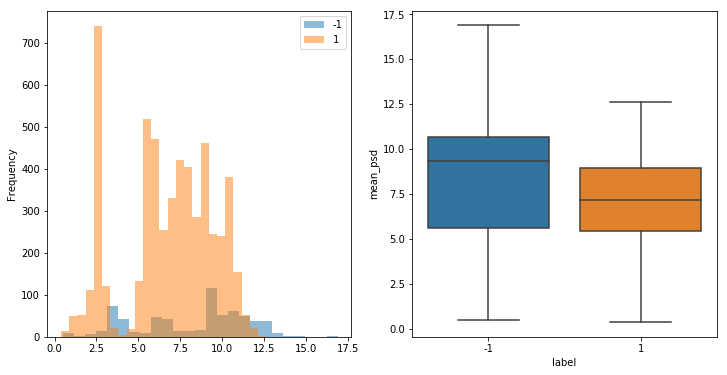

In [57]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_psd', data = df_feature,ax=ax[1])

var

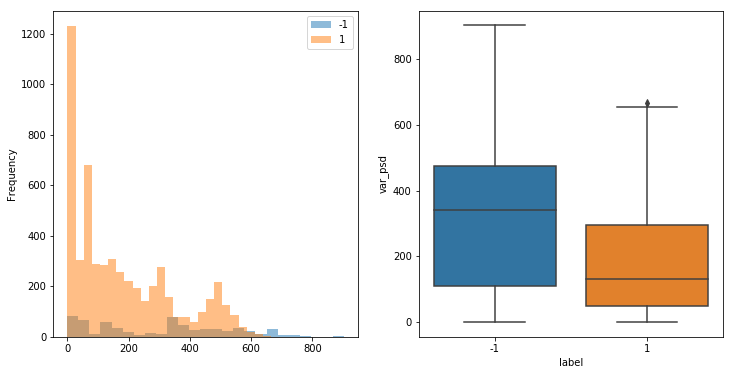

In [58]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_psd', data = df_feature,ax=ax[1])

std plot

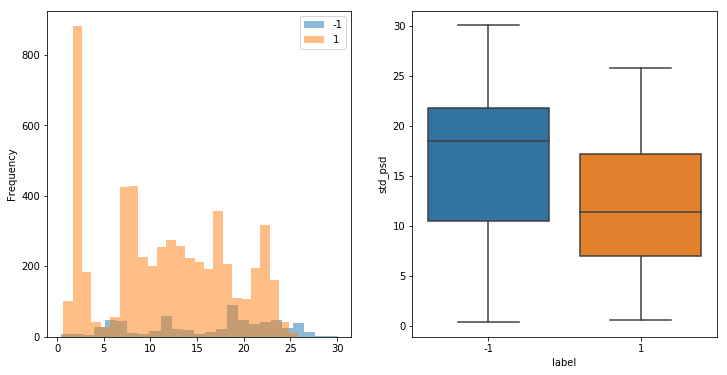

In [59]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_psd', data = df_feature,ax=ax[1])

skew plot

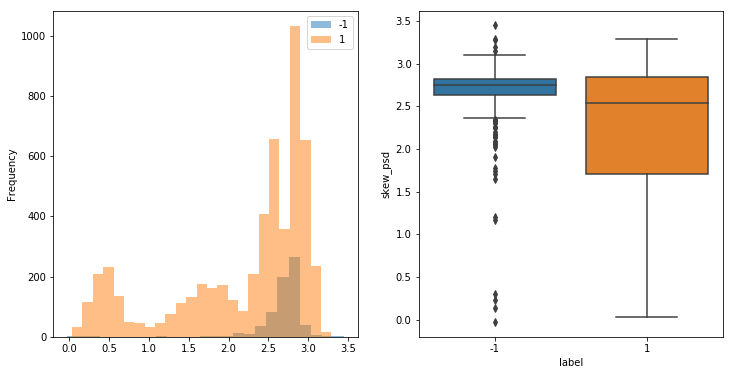

In [60]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_psd', data = df_feature,ax=ax[1])

kurt plot

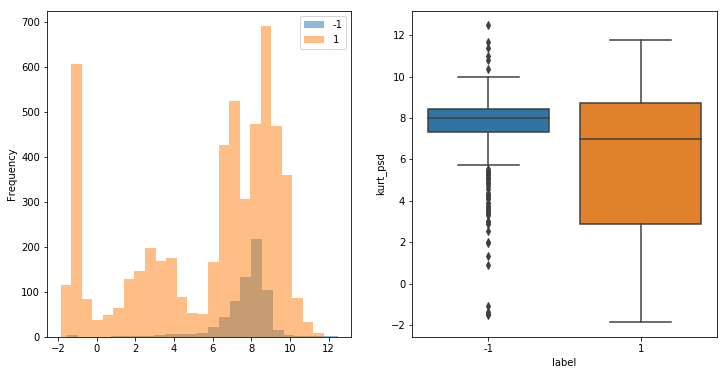

In [61]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_psd', data = df_feature,ax=ax[1])

mode plot

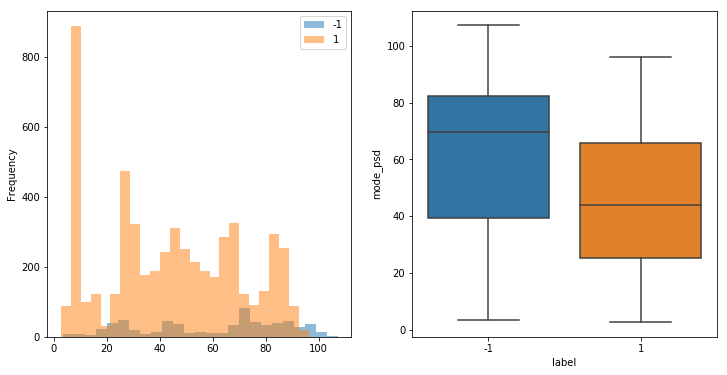

In [62]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_psd', data = df_feature,ax=ax[1])

# Pywavelet

Approximation coefficient contains high freq signal(passed from low pass filter) , Deatil Cofficient contains low freq signal(high pass filter).

CA - contain high freq
CD - contain low freq

Ceeating CA at 4 scales[0:250],[0,125],[0,62],[0,31]
and DC at [0,250]

In [63]:
from pywt import dwt

In [64]:
CA1 = []
CD1 = []
for x in range(0,result.shape[0]):
    cA,cD = dwt(result.iloc[x],'db1')
    CA1.append(cA)
    CD1.append(cD)

result_wave_CA1 = pd.DataFrame(CA1,index=df_feature.index)
result_wave_CD1 = pd.DataFrame(CD1,index=df_feature.index)

In [65]:
df_feature["mean_ca1"] = result_wave_CA1.mean(axis=1)
df_feature["var_ca1"] = result_wave_CA1.var(axis=1)
df_feature["std_ca1"] = result_wave_CA1.std(axis=1)
df_feature["skew_ca1"] = result_wave_CA1.skew(axis=1)
df_feature["kurt_ca1"] = result_wave_CA1.kurt(axis=1)
df_feature["mode_ca1"] = result_wave_CA1.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_ca1"] = result_wave_CA1.kurtosis(axis=1)

In [66]:
df_feature["mean_cd1"] = result_wave_CD1.mean(axis=1)
df_feature["var_cd1"] = result_wave_CD1.var(axis=1)
df_feature["std_cd1"] = result_wave_CD1.std(axis=1)
df_feature["skew_cd1"] = result_wave_CD1.skew(axis=1)
df_feature["kurt_cd1"] = result_wave_CD1.kurt(axis=1)
df_feature["mode_cd1"] = result_wave_CD1.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_cd1"] = result_wave_CD1.kurtosis(axis=1)

# Coefficient Approximation plot at scale1

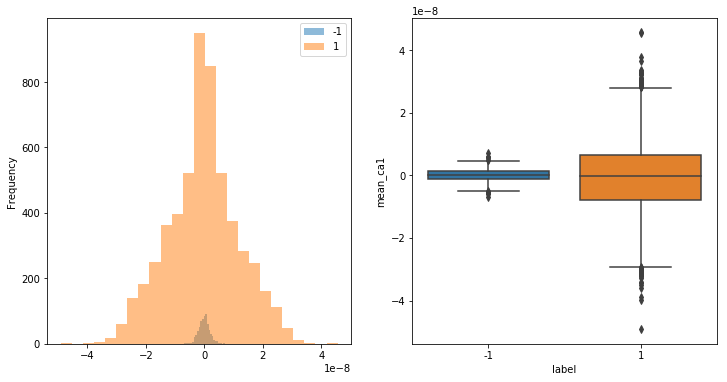

In [67]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_ca1', data = df_feature,ax=ax[1])

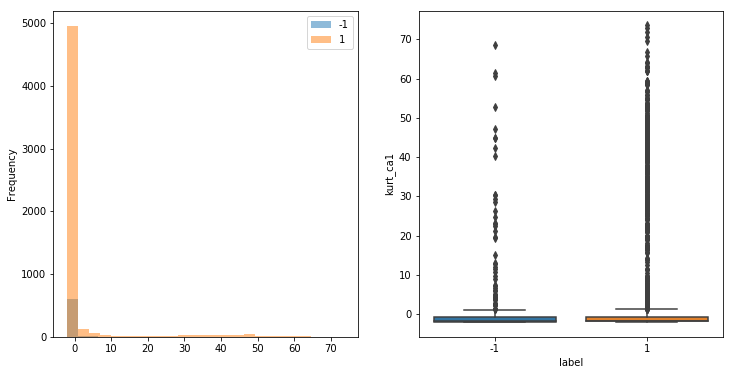

In [68]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_ca1', data = df_feature,ax=ax[1])

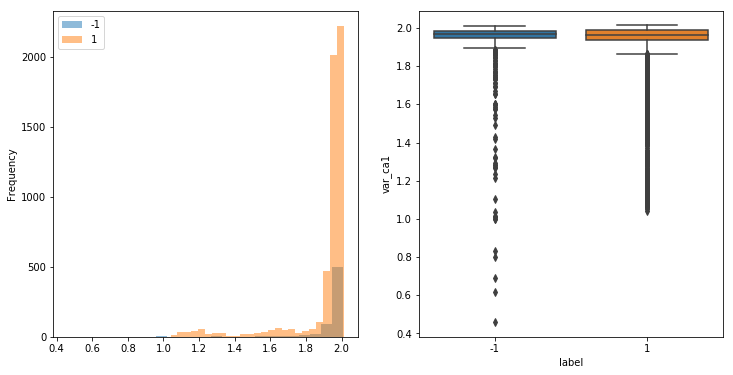

In [69]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_ca1', data = df_feature,ax=ax[1])

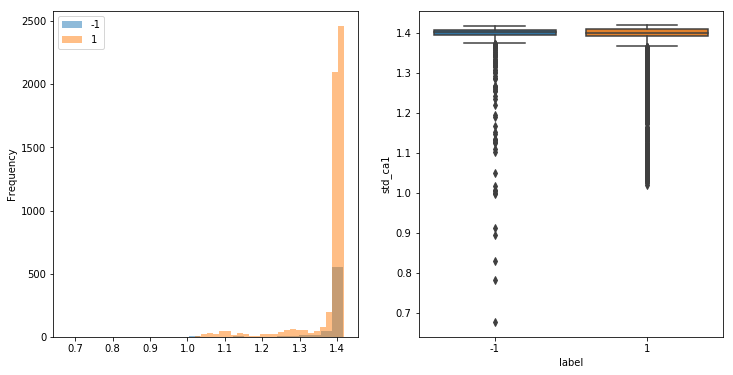

In [70]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_ca1', data = df_feature,ax=ax[1])

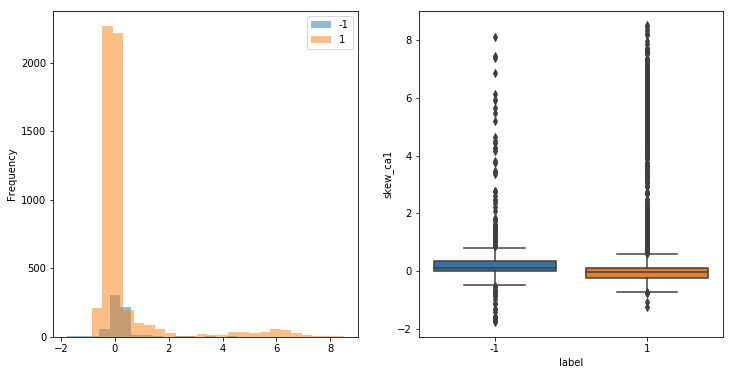

In [71]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_ca1', data = df_feature,ax=ax[1])

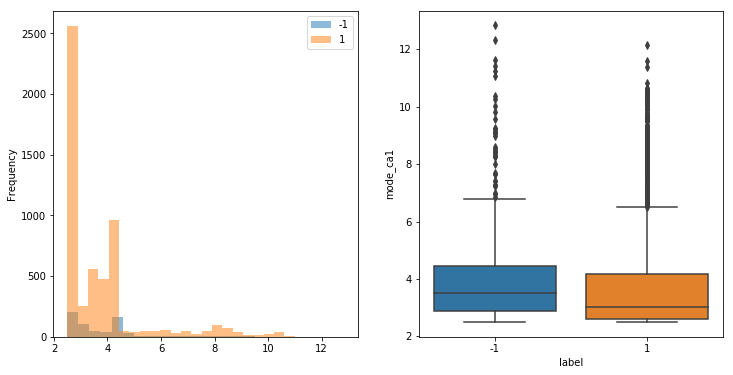

In [72]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca1', data = df_feature,ax=ax[1])

# Coefficient Details plot 

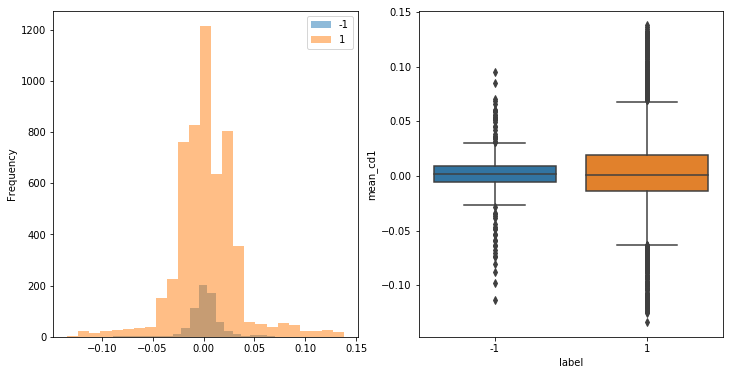

In [73]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_cd1', data = df_feature,ax=ax[1])

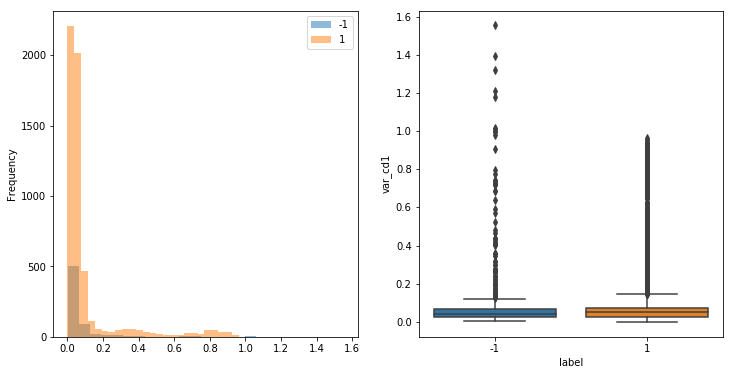

In [74]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_cd1', data = df_feature,ax=ax[1])

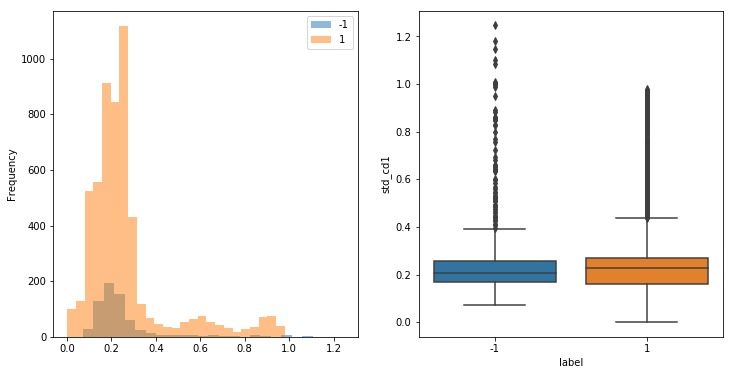

In [75]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_cd1', data = df_feature,ax=ax[1])

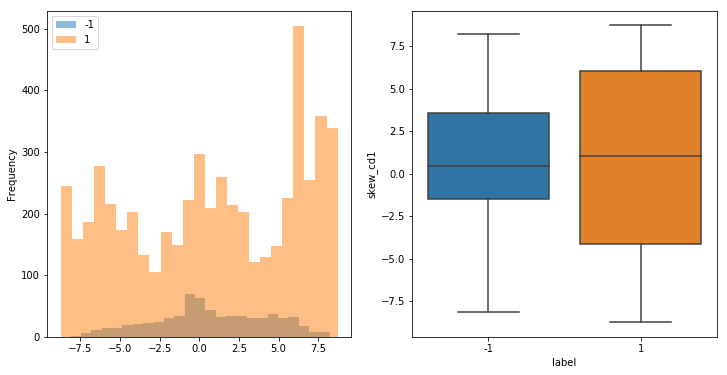

In [76]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_cd1', data = df_feature,ax=ax[1])

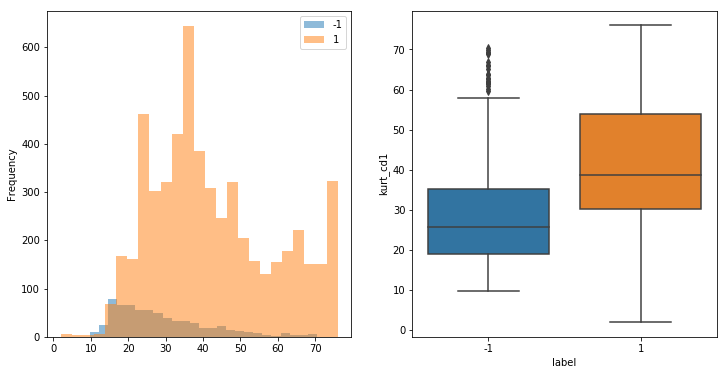

In [77]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_cd1', data = df_feature,ax=ax[1])

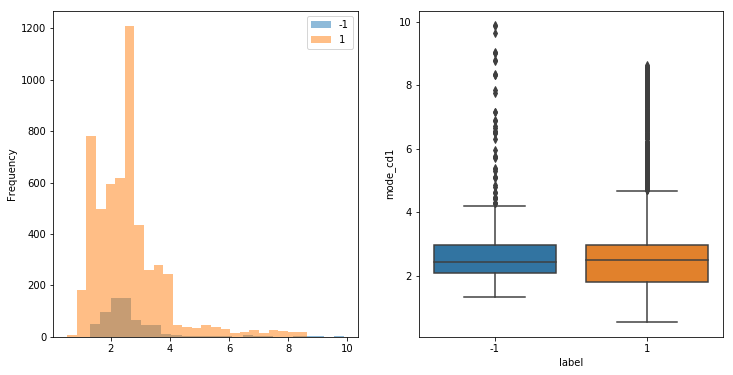

In [78]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_cd1', data = df_feature,ax=ax[1])

## Coefficient Approximation at scale 2

In [79]:
CA2 = []

for x in range(0,result_wave_CA1.shape[0]):
    cA,cD = dwt(result_wave_CA1.iloc[x],'db1')
    CA2.append(cA)

result_wave_CA2 = pd.DataFrame(CA2,index=df_feature.index)

In [80]:
df_feature["mean_ca2"] = result_wave_CA1.mean(axis=1)
df_feature["var_ca2"] = result_wave_CA1.var(axis=1)
df_feature["std_ca2"] = result_wave_CA1.std(axis=1)
df_feature["skew_ca2"] = result_wave_CA1.skew(axis=1)
df_feature["kurt_ca2"] = result_wave_CA1.kurt(axis=1)
df_feature["mode_ca2"] = result_wave_CA1.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_ca2"] = result_wave_CA1.kurtosis(axis=1)

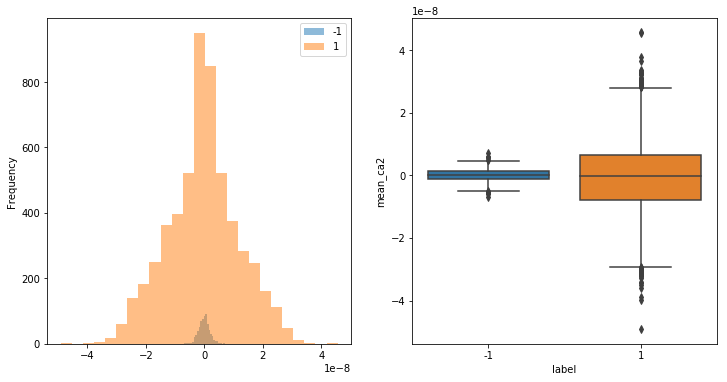

In [81]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_ca2', data = df_feature,ax=ax[1])

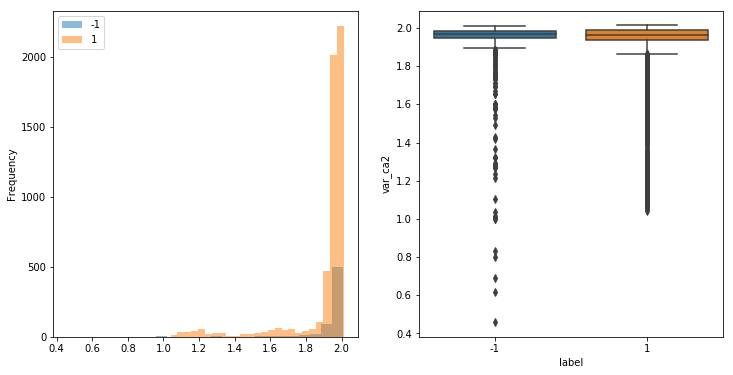

In [82]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_ca2', data = df_feature,ax=ax[1])

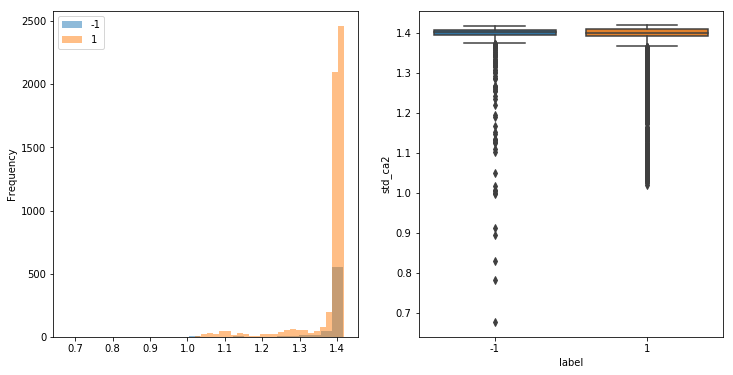

In [83]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_ca2', data = df_feature,ax=ax[1])

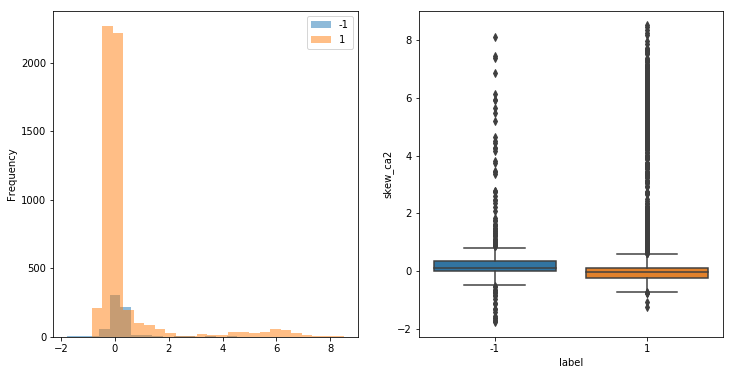

In [84]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_ca2', data = df_feature,ax=ax[1])

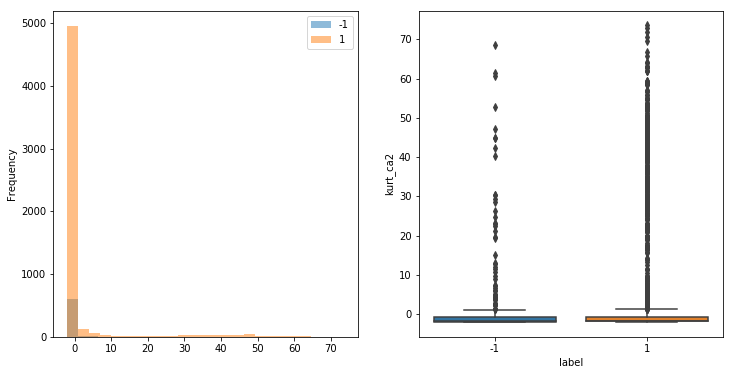

In [85]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_ca2', data = df_feature,ax=ax[1])

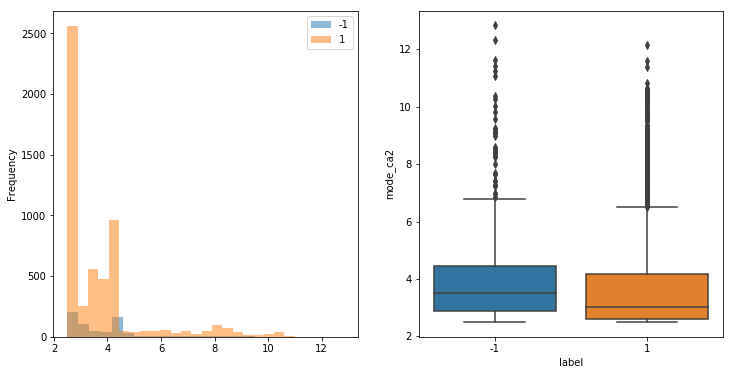

In [86]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca2', data = df_feature,ax=ax[1])

# Coeefficient approximation scale 3

In [87]:
CA3 = []

for x in range(0,result_wave_CA2.shape[0]):
    cA,cD = dwt(result_wave_CA2.iloc[x],'db1')
    CA3.append(cA)

result_wave_CA3 = pd.DataFrame(CA3,index=df_feature.index)

In [88]:
df_feature["mean_ca3"] = result_wave_CA3.mean(axis=1)
df_feature["var_ca3"] = result_wave_CA3.var(axis=1)
df_feature["std_ca3"] = result_wave_CA3.std(axis=1)
df_feature["skew_ca3"] = result_wave_CA3.skew(axis=1)
df_feature["kurt_ca3"] = result_wave_CA3.kurt(axis=1)
df_feature["mode_ca3"] = result_wave_CA3.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_ca3"] = result_wave_CA3.kurtosis(axis=1)

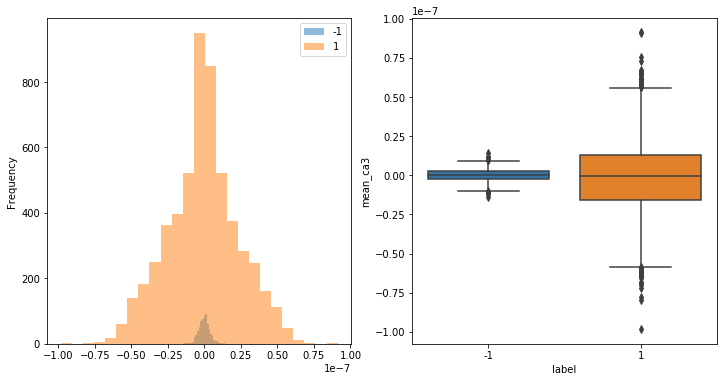

In [89]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_ca3', data = df_feature,ax=ax[1])

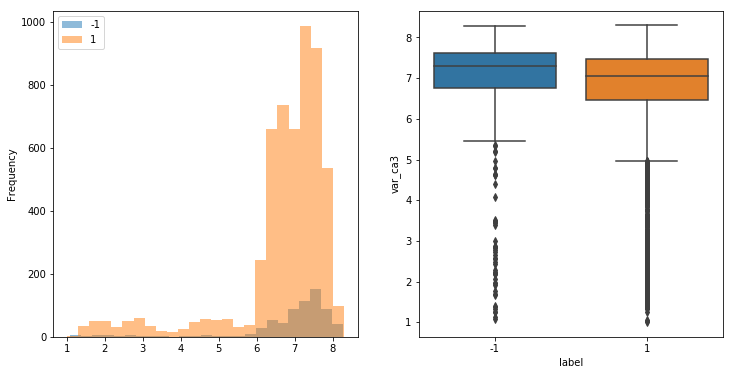

In [90]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_ca3', data = df_feature,ax=ax[1])

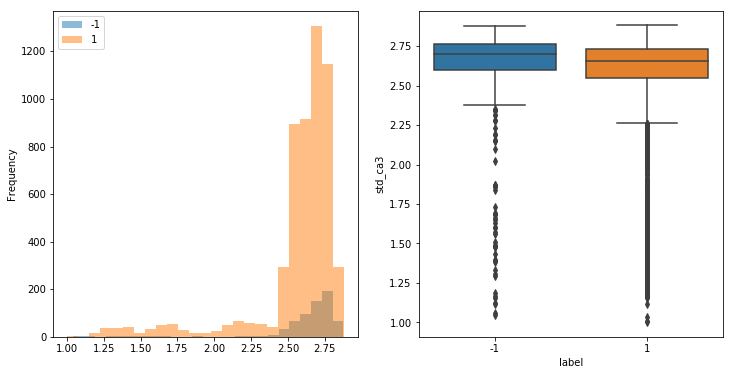

In [91]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_ca3', data = df_feature,ax=ax[1])

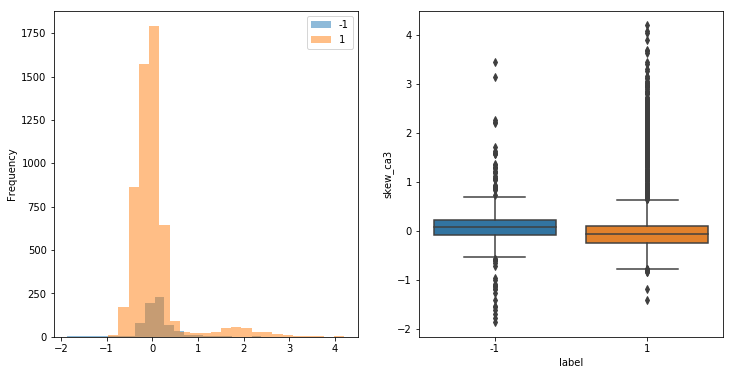

In [92]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_ca3', data = df_feature,ax=ax[1])

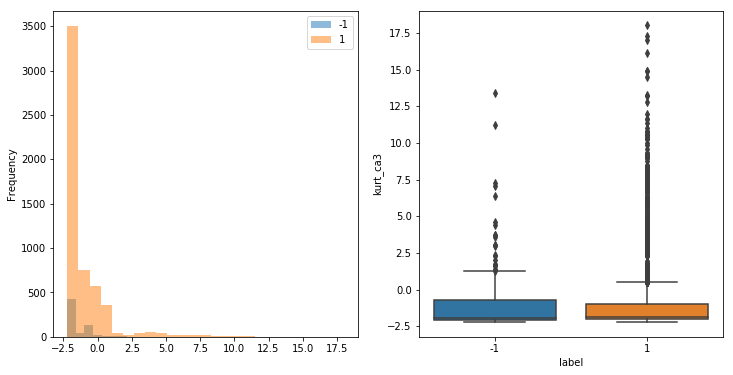

In [93]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_ca3', data = df_feature,ax=ax[1])

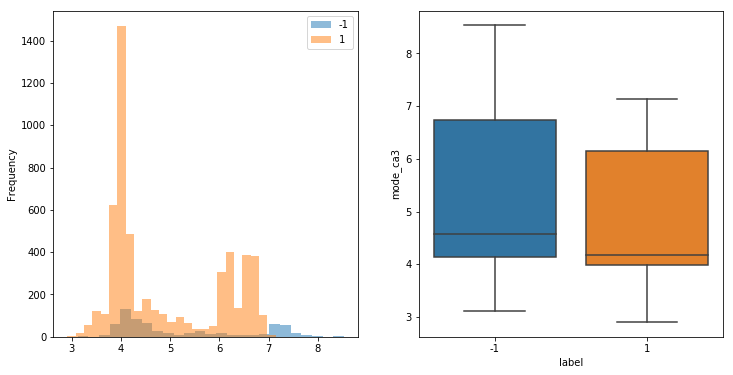

In [94]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca3', data = df_feature,ax=ax[1])

## Coefficient approximaion scale4

In [95]:
CA4 = []

for x in range(0,result_wave_CA3.shape[0]):
    cA,cD = dwt(result_wave_CA3.iloc[x],'db1')
    CA4.append(cA)

result_wave_CA4 = pd.DataFrame(CA4,index=df_feature.index)

In [96]:
df_feature["mean_ca4"] = result_wave_CA4.mean(axis=1)
df_feature["var_ca4"] = result_wave_CA4.var(axis=1)
df_feature["std_ca4"] = result_wave_CA4.std(axis=1)
df_feature["skew_ca4"] = result_wave_CA4.skew(axis=1)
df_feature["kurt_ca4"] = result_wave_CA4.kurt(axis=1)
df_feature["mode_ca4"] = result_wave_CA4.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_ca4"] = result_wave_CA4.kurtosis(axis=1)

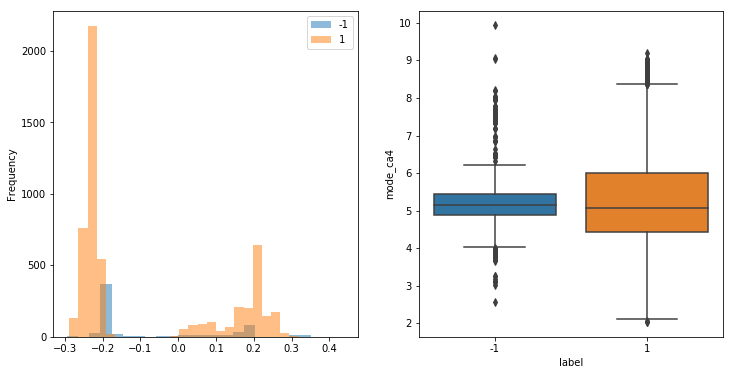

In [97]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca4', data = df_feature,ax=ax[1])

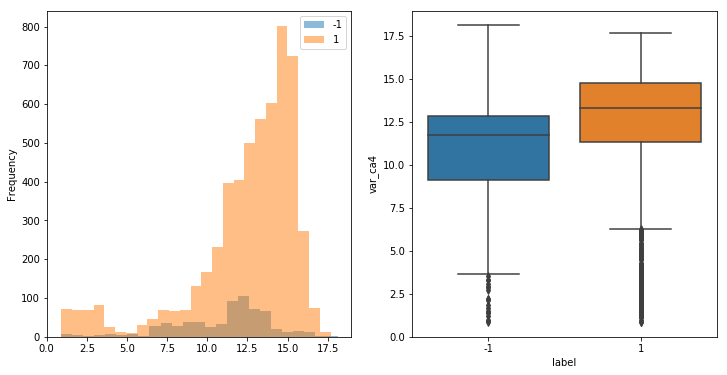

In [98]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_ca4', data = df_feature,ax=ax[1])

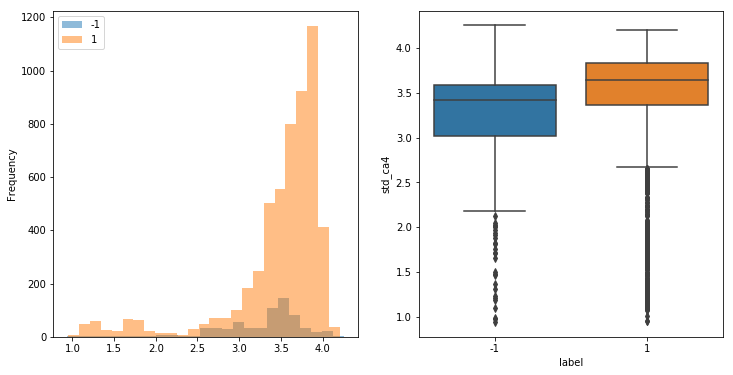

In [99]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_ca4', data = df_feature,ax=ax[1])

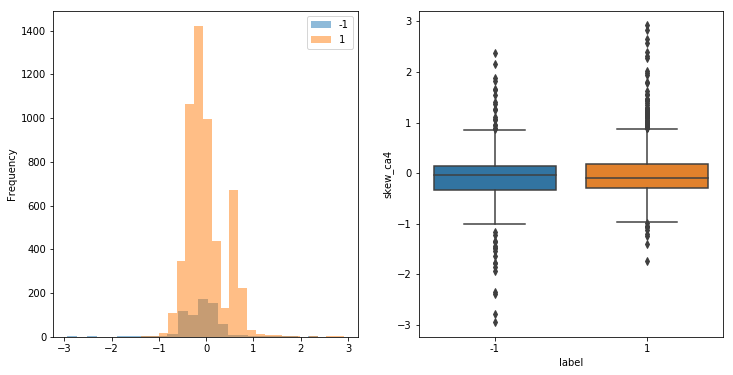

In [100]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_ca4', data = df_feature,ax=ax[1])

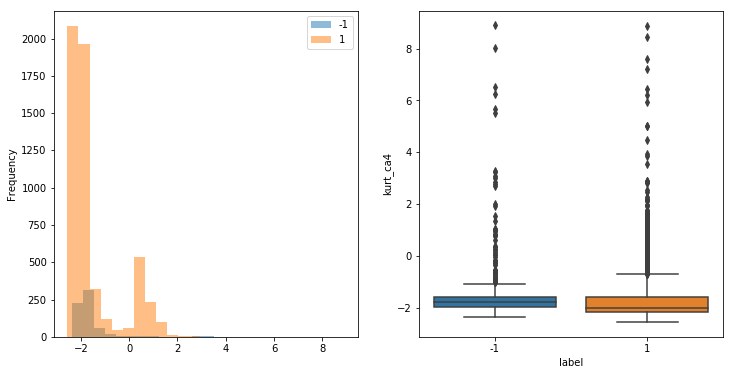

In [101]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_ca4', data = df_feature,ax=ax[1])

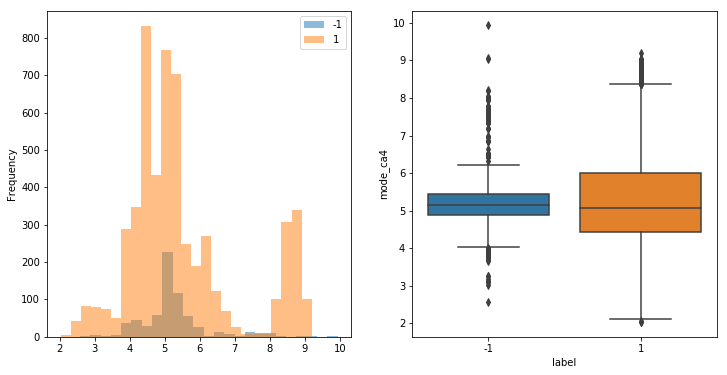

In [102]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca4', data = df_feature,ax=ax[1])

# Autocorelation

In [103]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

In [104]:
arr = []
for i in range(0,result.shape[0]):
    ar = autocorr(result.iloc[i])
    arr.append(ar)  

result_ac = pd.DataFrame(arr,index=df_feature.index)
#result_psd = pd.DataFrame([ welch(result.iloc[x])[1] for x in range(0,result.shape[0])],index=df_feature.index)

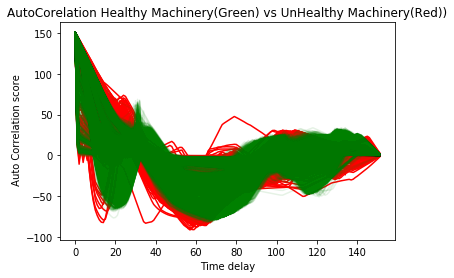

In [105]:
# FFT superimpose Good engine vs Bad engine
result_ac['label'] = df_feature['label']
result_ac_good = result_ac[result_ac['label'] == 1]
result_ac_good = result_ac_good.drop(['label'],axis=1)
result_ac_bad = result_ac[result_ac['label'] == -1]
result_ac_bad = result_ac_bad.drop(['label'],axis=1)
for ix in range(0,result_ac_bad.shape[0]):
    plt.plot([i for i in range(0,152)], result_ac_bad.iloc[ix][0:152], linestyle='-', color='red')
for ix in range(0,result_ac_good.shape[0]):
    plt.plot([i for i in range(0,152)], result_ac_good.iloc[ix][0:152], linestyle='-', color='green',alpha = 0.1)

plt.xlabel('Time delay')
plt.ylabel(' Auto Correlation score')
plt.title('AutoCorelation Healthy Machinery(Green) vs UnHealthy Machinery(Red))');